# Regression

** Something is going on with the moduls of the theta**

If you look the the source code for printing theta:

```cout << "  theta[" << i << "] = " << theta[i] % p << endl;```

but p is not a nomal number it is a ZZ dtype from the NTL libary (maybe this one: http://www.shoup.net/ntl/doc/ZZ_p.txt)

In [2]:
import pandas as pd
from matplotlib.pylab import plt
from scipy import stats

Output for 1d linear regression:

```
josh@turing:~/git/fhe-si$ ./tests/Test_Regression_x test_10k_1d.dat 23 7
================================================
Running regression tests using Brakerski system.
================================================
Parameters:
  data file: test_10k_1d.dat
  logQ: 67
  p: 23
  generator: 7
  block size: 8
  num blocks: 1250
Running 1-dimensional regression on 10000 datapoints in 1250 blocks, modulo prime 23
Expected values:
  theta[0] = 18
  Determinant: 2


Setup time: 0.005823
Batch time: 0.062058
Encryption time: 0.765344
Regression time: 0.705653

Computed values:
  theta[0] = [18]
  Determinant: [2]

Decryption time: 0.000492
Total time: 1.53968
```

In [5]:
test_10k_1d = pd.read_csv('/home/josh/git/fhe-si/test_10k_1d.dat', delimiter=' ', skiprows=1, header=None,
                          names=['x', 'y'])
test_10k_1d.head()

,x,y
0,-95,-389
1,-50,-354
2,-36,-145
3,31,258
4,89,378


In [77]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the training sets
regr.fit(test_10k_1d[['x']].values, test_10k_1d['y'].values)
regr.coef_

array([ 4.29924333])

In [79]:
regr.coef_ % 7

array([ 4.29924333])

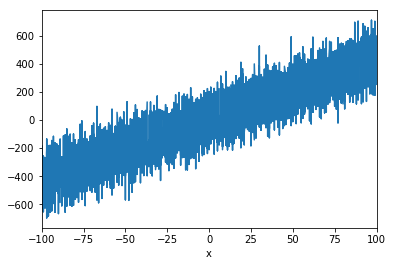

In [24]:
test_10k_1d.sort_values('x').set_index('x')['y'].plot()
plt.show()

In [37]:
4.29931819101**2

18.4841369075495

Output:
```
josh@turing:~/git/fhe-si$ ./tests/Test_Regression_x test_10k.dat 23 7
================================================
Running regression tests using Brakerski system.
================================================
Parameters:
  data file: test_10k.dat
  logQ: 67
  p: 23
  generator: 7
  block size: 8
  num blocks: 1250
Running 2-dimensional regression on 10000 datapoints in 1250 blocks, modulo prime 23
Expected values:
  theta[0] = 12
  theta[1] = 17
  Determinant: 15


Setup time: 0.007346
Batch time: 0.062636
Encryption time: 1.1399
Regression time: 1.73391

Computed values:
  theta[0] = [12]
  theta[1] = [17]
  Determinant: [15]

Decryption time: 0.000874
Total time: 2.94519
```

In [3]:
test_10k = pd.read_csv('/home/josh/git/fhe-si/test_10k.dat', delimiter=' ', skiprows=1, header=None,
                       names=['x', 'y', 'z'])
test_10k.head()

,x,y,z
0,84,-75,814
1,-15,19,-270
2,-92,7,-558
3,63,-32,508
4,-75,43,-622


In [48]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the training sets
regr.fit(test_10k[['x', 'y']].values, test_10k['z'].values)
regr.coef_

array([ 4.21534502, -4.93122252])

In [74]:
regr.coef_ % 23

array([  4.21534502,  18.06877748])

In [71]:
# Manual way using matrix multiplicaiton

import numpy as np

x = test_10k[['x','y']].values
y = test_10k[['z']].values
y = np.expand_dims(y, axis=0)

np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)

array([[[ 4.21534502],
        [-4.93122252]]])

# Statistics

```
josh@turing:~/git/fhe-si$ tests/Test_Statistics_x test_10k_1d.dat 23 7
================================================
Running statistics test using Brakerski system.
================================================
Parameters:
  data file: test_10k_1d.dat
  logQ: 68
  p: 23
  generator: 7
  block size: 8
  num blocks: 1250
Performing statistical analysis on 10000 values (dimension 1) in 1250 blocks, modulo prime 23

True values:
  Mean: -2848,
  Covariance:
  340124648896

Expected values:
  Mean: 4,
  N: 18

  Covariance:
  20

  N^2: 2

Setup time: 0.008578
Batch time: 0.034452
Encryption time: 0.930825
Computation time: 0.43685

Computed values:
  Mean: [4],
  N: [18]

  Covariance:
[20]

  N^2: [2]

Decryption time: 0.00113
Total time: 1.41241
```

In [6]:
test_10k_1d.mean()

x   -0.2848
y   -0.3304
dtype: float64

In [7]:
test_10k_1d.var()

x     3401.586648
y    72671.366372
dtype: float64

```
josh@turing:~/git/fhe-si$ tests/Test_Statistics_x test_10k.dat 23 7
================================================
Running statistics test using Brakerski system.
================================================
Parameters:
  data file: test_10k.dat
  logQ: 68
  p: 23
  generator: 7
  block size: 8
  num blocks: 1250
Performing statistical analysis on 10000 values (dimension 2) in 1250 blocks, modulo prime 23

True values:
  Mean: 5803, -1659,
  Covariance:
  337991675191 6137137177
  6137137177 331171957719

Expected values:
  Mean: 7, 20,
  N: 18

  Covariance:
  16 4
  4 9

  N^2: 2

Setup time: 0.008578
Batch time: 0.051949
Encryption time: 1.22704
Computation time: 1.22445

Computed values:
  Mean: [7], [20],
  N: [18]

  Covariance:
[16] [4]
[4] [9]

  N^2: [2]

Decryption time: 0.002022
Total time: 2.51438
```

In [4]:
test_10k.mean()

x    0.5803
y   -0.1659
z    4.1346
dtype: float64